In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
import os
import random
from tqdm import tqdm

In [2]:
prcs = pickle.load(open('prc_binary_spectral.pkl', 'rb'))
report = pickle.load(open('report_binary_spectral.pkl', 'rb'))

In [3]:
plt.rcParams['font.size'] = 12
n_splits=5
colors = ['black', 'gold']

In [4]:
cats = ['cluster'+str(x+1) for x in [0,1]]
lb = LabelEncoder()
cats = lb.fit_transform(cats)

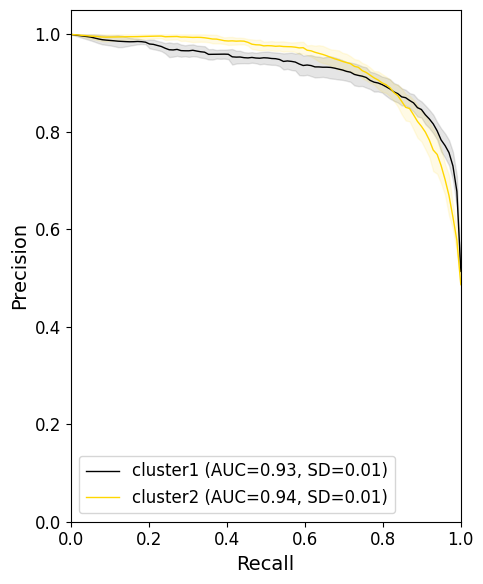

In [5]:
lw = 1
plt.figure(figsize=(5,6))
mean_recall = np.linspace(0, 1, 100)

for i, color in zip(range(len(lb.classes_)), colors):
    a_prec = []
    for j in range(n_splits):
        df = prcs[prcs["class"] == lb.classes_[i]]
        df = df[df["fold"] == j]
        prec_fold = df['precision']
        recall_fold = df['recall']
        prec_fold = prec_fold[::-1]
        recall_fold = recall_fold[::-1]
        a_prec.append(np.interp(mean_recall, recall_fold, prec_fold))
                 
    mean_prec = np.mean(a_prec, axis=0)
    std_prec = np.std(a_prec, axis=0)
    prec_upper = np.minimum(mean_prec + std_prec, 1)
    prec_lower = np.maximum(mean_prec - std_prec, 0)
    plt.fill_between(mean_recall, prec_lower, prec_upper, color=color, alpha=.1)
    

    mean_auc = np.mean(report.loc[lb.classes_[i]]['auprc'])
    std_auc = np.std(report.loc[lb.classes_[i]]['auprc'])
    plt.plot(mean_recall, mean_prec, color=color,
             label='{0} (AUC={1:0.2f}, SD={2:0.2f})' ''.format(lb.classes_[i].split(' ')[0], mean_auc, std_auc),
             lw=1)
            

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig('performance_5CFV_AUPRC.png', dpi=300)
plt.show()